In [2]:
#pip install igraph

In [3]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 경로 설정 (예: Malgun Gothic)
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 경우
font_prop = fm.FontProperties(fname=font_path, size=12)

# 전체 출력 설정
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

# Matplotlib의 기본 글꼴 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시 설정

In [4]:
df = pd.read_csv("data/물품 입찰분류별 투찰업체 내역_2022년01월.csv")

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_18580\3666503668.py:1: DtypeWarning: Columns (2,4,27,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/물품 입찰분류별 투찰업체 내역_2022년01월.csv")


In [16]:
df.head()

등록유형  조달구분 공고시스템명    공고게시일자       입찰공고번호  입찰공고차수  입찰분류번호    공고기관명  \
0  나라장터(G2B)  자체조달    NaN  20220101  20220100009       0       1  경기도 광명시   
1  나라장터(G2B)  자체조달    NaN  20220101  20220100009       0       1  경기도 광명시   
2  나라장터(G2B)  자체조달    NaN  20220101  20220100009       0       1  경기도 광명시   
3  나라장터(G2B)  자체조달    NaN  20220101  20220100009       0       1  경기도 광명시   
4  나라장터(G2B)  자체조달    NaN  20220101  20220100009       0       1  경기도 광명시   

    공고기관코드   실수요기관명    수요기관명   수요기관코드 수요기관구분  수요기관지역명             품명내용  \
0  3900000  경기도 광명시  경기도 광명시  3900000    지자체  경기도 광명시  정기간행물[55101519]   
1  3900000  경기도 광명시  경기도 광명시  3900000    지자체  경기도 광명시  정기간행물[55101519]   
2  3900000  경기도 광명시  경기도 광명시  3900000    지자체  경기도 광명시  정기간행물[55101519]   
3  3900000  경기도 광명시  경기도 광명시  3900000    지자체  경기도 광명시  정기간행물[55101519]   
4  3900000  경기도 광명시  경기도 광명시  3900000    지자체  경기도 광명시  정기간행물[55101519]   

              세부품명내용 긴급공고여부                           공고명        추정가격  \
0  정기간행물[5510151901]      Y  2022년 소하(충현)도서관 연속간행물(잡지) 구입  31,012,400   
1  정기간행물[5510151901]      Y  2022년 소하(충현)도서관 연속간행물(잡지) 구입  31,012,400   
2  정기간행물[5510151901]      Y  2022년 소하(충현)도서관 연속간행물(잡지) 구입  31,012,400   
3  정기간행물[5510151901]      Y  2022년 소하(충현)도서관 연속간행물(잡지) 구입  31,012,400   
4  정기간행물[5510151901]      Y  2022년 소하(충현)도서관 연속간행물(잡지) 구입  31,012,400   

         배정예산     입찰서개시일자     입찰서마감일자      개찰일자  입찰방식        기초금액        예정가격  \
0  31,012,400  20220103.0  20220107.0  20220107  전자입찰  31,012,400  31,276,675   
1  31,012,400  20220103.0  20220107.0  20220107  전자입찰  31,012,400  31,276,675   
2  31,012,400  20220103.0  20220107.0  20220107  전자입찰  31,012,400  31,276,675   
3  31,012,400  20220103.0  20220107.0  20220107  전자입찰  31,012,400  31,276,675   
4  31,012,400  20220103.0  20220107.0  20220107  전자입찰  31,012,400  31,276,675   

  참가수 개찰순위       입찰업체명  입찰업체사업자등록번호 입찰업체기업구분명        입찰일자      입찰시간     입찰률  \
0  36    1  박종민 M 1139   5111830391      중소기업  20220106.0  17:00:11  88.133   
1  36    2       이수컴퍼니   1020662245      중소기업  20220105.0  19:39:19  88.172   
2  36    3   에스에이치 컴퍼니   1172101016      중소기업  20220106.0  08:49:44  88.199   
3  36    4       브이엘상사   5090297097      중소기업  20220107.0  08:04:02  88.368   
4  36    5        부광서적   1400806119      중소기업  20220106.0  12:55:32  88.560   

         입찰금액 부적격여부 부적격사유 낙찰여부        낙찰자결정방법                      입찰계약방법  \
0  27,565,140     N   NaN    Y  제한적최저가(낙찰하한율)  수의(총액)소액-견적입찰(2인 이상 견적 제출)   
1  27,577,400     N   NaN    N  제한적최저가(낙찰하한율)  수의(총액)소액-견적입찰(2인 이상 견적 제출)   
2  27,585,927     N   NaN    N  제한적최저가(낙찰하한율)  수의(총액)소액-견적입찰(2인 이상 견적 제출)   
3  27,638,870     N   NaN    N  제한적최저가(낙찰하한율)  수의(총액)소액-견적입찰(2인 이상 견적 제출)   
4  27,698,720     N   NaN    N  제한적최저가(낙찰하한율)  수의(총액)소액-견적입찰(2인 이상 견적 제출)   

  업종제한여부 업종제한내용          지역제한내용 공동도급구성방식명 조항호코드 조항호명 정보화사업여부 기술평가대행여부  낙찰하한율  \
0      N    NaN  경기도 광명시[41210]    공동수급불허   NaN  NaN     NaN      NaN   88.0   
1      N    NaN  경기도 광명시[41210]    공동수급불허   NaN  NaN     NaN      NaN   88.0   
2      N    NaN  경기도 광명시[41210]    공동수급불허   NaN  NaN     NaN      NaN   88.0   
3      N    NaN  경기도 광명시[41210]    공동수급불허   NaN  NaN     NaN      NaN   88.0   
4      N    NaN  경기도 광명시[41210]    공동수급불허   NaN  NaN     NaN      NaN   88.0   

              참조번호 조달요청번호  
0  광명시공고 제 2022-5호    NaN  
1  광명시공고 제 2022-5호    NaN  
2  광명시공고 제 2022-5호    NaN  
3  광명시공고 제 2022-5호    NaN  
4  광명시공고 제 2022-5호    NaN

In [5]:
# Extract unique institution and bidder names
institutions = df['공고기관명'].unique().tolist() # df['공고기관명'].unique() -> 중복되지 않는 기관명 리스트 생성
bidders = df['입찰업체명'].unique().tolist() # .tolist() -> Numpy Array가 아닌 일반 리스트로 변환

# Create a mapping for node indices
institution_indices = {name: i for i, name in enumerate(institutions)} # 공고 기관명을 0번부터 순서대로 index 붙임. 0 ~ N번
bidder_indices = {name: i + len(institutions) for i, name in enumerate(bidders)} # 입찰업체는 N+1번부터 순서대로 index 붙임. N+1 ~ M번

# Create edges (linking institutions to bidders)
edges = [(institution_indices[row['공고기관명']], bidder_indices[row['입찰업체명']]) for _, row in df.iterrows()] # (기관 인덱스, 업체인덱스) 튜플 생성!

# Create bipartite graph
graph = ig.Graph(edges=edges, directed=False) # Edge의 정보를 이용해서 무방향 그래프 생성
graph.vs["type"] = [0] * len(institutions) + [1] * len(bidders)  # 0 = institutions, 1 = bidders
# 인덱스를 공고기관과 입찰업체 순서로 순차적으로 붙인 이유가 위 코드 때문임. Type를 주기 편하게 하기 위해서.

# Perform bipartite projection (focusing on bidders)
_, bidders_projection = graph.bipartite_projection(multiplicity=True) # 0에 대한 Projection은 필요없으므로 버리기

# Compute the degree matrix for the one-mode network
degrees = bidders_projection.degree() # 각 입찰업체의 Degree 계산
degree_matrix = np.diag(degrees) # 대각 행렬이므로 정의에 따라서 그냥 만듦.

# Print the degree matrix
print("Degree Matrix for '입찰업체명' One-Mode Network:")
degree_matrix


Degree Matrix for '입찰업체명' One-Mode Network:


array([[5639,    0,    0, ...,    0,    0,    0],
       [   0, 8353,    0, ...,    0,    0,    0],
       [   0,    0, 9720, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  312,    0,    0],
       [   0,    0,    0, ...,    0,  312,    0],
       [   0,    0,    0, ...,    0,    0,  312]])

In [6]:
print(f"Number of nodes (vertices): {graph.vcount()}")
print(f"Number of edgraphes: {graph.ecount()}")
print(f"Density: {graph.density():.4f}")  # 밀도 = 실제 간선 수 / 가능한 간선 수

Number of nodes (vertices): 23105
Number of edgraphes: 225137
Density: 0.0008


In [7]:
# 최소 차수 2 이상인 노드만 남김
filtered_nodes = [v.index for v in graph.vs if graph.degree(v) > 120]
filtered_graph = graph.subgraph(filtered_nodes)

print(f"Number of nodes (vertices): {filtered_graph.vcount()}")
print(f"Number of edgraphes: {filtered_graph.ecount()}")
print(f"Density: {filtered_graph.density():.4f}") 

Number of nodes (vertices): 318
Number of edgraphes: 8451
Density: 0.1677


In [8]:
# 차수가 2 이상인 노드만 포함된 엣지 선택
valid_edges = [(e.source, e.target) for e in graph.es if graph.degree(e.source) > 100 and graph.degree(e.target) > 100]

# 필터링된 엣지만을 포함하는 새로운 서브그래프 생성
filtered_graph = ig.Graph(edges=valid_edges, directed=False)

# 불필요한 고립된 노드(엣지가 없는 노드) 제거
filtered_graph = filtered_graph.subgraph([v.index for v in filtered_graph.vs if filtered_graph.degree(v) > 0])
print(f"Number of nodes (vertices): {filtered_graph.vcount()}")
print(f"Number of edgraphes: {filtered_graph.ecount()}")
print(f"Density: {filtered_graph.density():.4f}") 

Number of nodes (vertices): 342
Number of edgraphes: 11301
Density: 0.1938


In [9]:
#pip install pycairo cairocffi

In [10]:
import cairo

# 빠른 레이아웃 사용 (Kamada-Kawai)
layout = filtered_graph.layout("fr")

# 시각화
ig.plot(filtered_graph, layout=layout, vertex_size=2.5, edge_width=0.1, bbox = (500, 300))

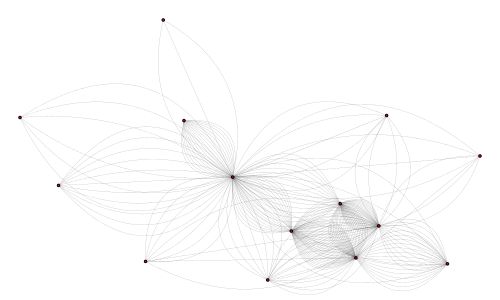

In [13]:
# 차수가 100 이상인 노드만 포함된 엣지 선택
valid_edges = [(e.source, e.target) for e in graph.es if graph.degree(e.source) > 100 and graph.degree(e.target) > 100]

# 필터링된 엣지만을 포함하는 새로운 서브그래프 생성
filtered_graph = ig.Graph(edges=valid_edges, directed=False)

# 불필요한 고립된 노드(엣지가 없는 노드) 제거
filtered_graph = filtered_graph.subgraph([v.index for v in filtered_graph.vs if filtered_graph.degree(v) > 0])

# POWER가 가장 강한 노드 필터링 (예: 차수가 200 이상인 노드)
strong_power_nodes = [v.index for v in filtered_graph.vs if filtered_graph.degree(v) > 200]
strong_power_graph = filtered_graph.subgraph(strong_power_nodes)

# 시각화
layout = strong_power_graph.layout("fr")
ig.plot(strong_power_graph, layout=layout, vertex_size=2.5, edge_width=0.1, bbox=(500, 300))

In [27]:
df['입찰업체명'].value_counts()

입찰업체명
다온                                          231
더원컴퍼니                                       221
제이에스컴퍼니                                     218
유민상사                                        190
우진                                          183
헤이치 인 헤이치(hand in hand)                     174
에스에이리테일                                     170
라온                                          165
제이에이치테크                                     163
엠에스컴퍼니                                      163
에이스건설산업                                     161
한성                                          161
에스에스컴퍼니                                     158
에코아이엔티(ECHO INT)                            152
티에스와이                                       152
다을상사                                        148
케이에스유통                                      148
푸른에스씨                                       148
노브식스                                        148
한서유통                                        148
쌔미쌔미                              

In [24]:
degrees_df.head(10)

입찰업체명  degree
857                 한성   12711
667               유민상사   12602
1021             더원컴퍼니   12470
3274           에스에이리테일   12385
1488            엠에스컴퍼니   12360
3862                태정   12330
3925             바인시스템   12322
2936             티에스와이   12253
3000  에코아이엔티(ECHO INT)   12253
3413           에스에스컴퍼니   12244

In [ ]:
# 노드별 degree를 데이터프레임으로 변환
degrees_df = pd.DataFrame({
    '입찰업체명': bidders,
    'degree': np.diag(degree_matrix)
})

# degree 기준으로 정렬
degrees_df = degrees_df.sort_values('degree', ascending=False)

# 전체 노드 수 계산
total_nodes = len(degrees_df)
top_20_count = int(total_nodes * 0.2)
bottom_20_count = int(total_nodes * 0.2)

# 상위 20% 노드 추출
top_20_df = degrees_df.head(top_20_count)
print("\n상위 20% 높은 연결성을 가진 입찰업체 중 상위 10개:")
print(top_20_df.head(10))

# 하위 20% 노드 추출
bottom_20_df = degrees_df.tail(bottom_20_count)
print("\n하위 20% 낮은 연결성을 가진 입찰업체 중 상위 10개:")
print(bottom_20_df.head(10))

# 기초 통계량 출력
print("\n기초 통계:")
print(f"전체 노드 수: {total_nodes}")
print(f"상위 20% 평균 degree: {top_20_df['degree'].mean():.2f}")
print(f"하위 20% 평균 degree: {bottom_20_df['degree'].mean():.2f}")
print(f"전체 평균 degree: {degrees_df['degree'].mean():.2f}")


상위 20% 높은 연결성을 가진 입찰업체 중 상위 10개:
                 입찰업체명  degree
857                 한성   12711
667               유민상사   12602
1021             더원컴퍼니   12470
3274           에스에이리테일   12385
1488            엠에스컴퍼니   12360
3862                태정   12330
3925             바인시스템   12322
2936             티에스와이   12253
3000  에코아이엔티(ECHO INT)   12253
3413           에스에스컴퍼니   12244

하위 20% 낮은 연결성을 가진 입찰업체 중 상위 10개:
               입찰업체명  degree
15692          태양체육사     120
20672  서울우유 응암2동고객센터     120
18709         한국 ATA     119
16827  서울우유 김천남부고객센터     119
4949       안세정보통신(주)     119
18716           돌리산업     119
18710      주식회사 태일건설     119
13883        (주)강원철강     119
18719           태강전력     119
18718      태산건설 주식회사     119

기초 통계:
전체 노드 수: 21449
상위 20% 평균 degree: 9585.22
하위 20% 평균 degree: 40.32
전체 평균 degree: 3684.65


### One-Mode Network

#### (1) Bijection Matrix
- $B$를 일대일 대응 행렬이라 하며, 다음과 같이 정의한다.  
  - $B_{ij} = 1$ 일 때, 입찰자 $j$가 기관 $i$의 입찰에 참여한 것을 의미한다.  
  - Row는 기관을, Column은 입찰자를 나타낸다.  

#### (2) One-Mode Network의 행렬 계산  
- One-Mode Network의 인접 행렬 $A$는 다음과 같이 계산된다.  
  $$  
  A = B^T \cdot B  
  $$  
  - **Diagonal elements**: $A_{ii} = (B^T B)_{ii}$ 는 입찰자 $i$가 참여한 총 기관의 수를 나타낸다.  
    - 예를 들어, $A_{11} = {b_{\cdot 1}}^T b_{\cdot 1}$ 은 입찰자 1이 참여한 기관의 총 개수를 의미한다.  
  - **Off-diagonal elements**: $A_{ij} = (B^T B)_{ij}$ 는 입찰자 $i$와 입찰자 $j$가 함께 입찰한 기관의 총 개수를 나타낸다.  
    - 예를 들어, $A_{12} = {b_{\cdot 1}}^T b_{\cdot 2} = 1$ 이라면, 입찰자 1과 2가 함께 입찰한 기관이 1개임을 의미한다.  

#### (3) Degree Matrix 계산  
- **차수 행렬** $D$는 다음과 같이 정의된다.  
  $$  
  D = \text{diag}(A \cdot \mathbf{1})  
  $$  
  - 행렬 $A$의 $i$번째 행의 원소 합은 입찰자 $i$의 차수를 의미하며, 이는 해당 입찰자가 함께 입찰한 입찰자의 총 수를 나타낸다.  
  - 이를 계산하기 위해, 행렬 $A$와 모든 원소가 1인 벡터 $\mathbf{1}$의 내적을 구한다.  


In [11]:
#pip install powerlaw

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

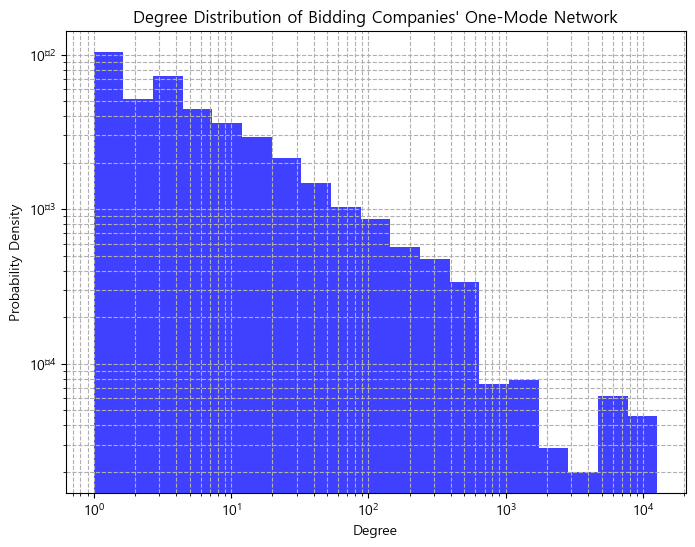

Calculating best minimal value for power law fit
Estimated power-law exponent (alpha): 22.942036201446438
KS-test result comparing to power-law: (0.8423457965197478, 0.4476324131398145)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import powerlaw  # To check if it's scale-free

# Extract degree sequence from the degree matrix
degrees = np.diag(degree_matrix)  # Degree of each node

# Remove zero-degree nodes (if any)
degrees = degrees[degrees > 0]

# Plot degree distribution (log-log scale)
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), 20), density=True, alpha=0.75, color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.title("Degree Distribution of Bidding Companies' One-Mode Network")
plt.grid(True, which="both", linestyle="--")
plt.show()

# Fit and test power-law behavior
fit = powerlaw.Fit(degrees)
print(f"Estimated power-law exponent (alpha): {fit.alpha}")
print(f"KS-test result comparing to power-law: {fit.distribution_compare('power_law', 'exponential')}")
